# Dogs vs Cat Redux

To start you will need to download and unzip the competition data from Kaggle and ensure your directory structure looks like this
```
utils/
    vgg16.py
    utils.py
lesson1/
    redux.ipynb
    data/
        redux/
            train/
                cat.437.jpg
                dog.9924.jpg
                cat.1029.jpg
                dog.4374.jpg
            test/
                231.jpg
                325.jpg
                1235.jpg
                9923.jpg
```

You can download the data files from the competition page [here](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data) or you can download them from the command line using the [Kaggle CLI](https://github.com/floydwch/kaggle-cli).

In [1]:
#Verify we are in the correct directory
%cd "~/courses/deeplearning1/nbs"
%pwd

/home/ubuntu/courses/deeplearning1/nbs


'/home/ubuntu/courses/deeplearning1/nbs'

In [2]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir + '/../data/redux'
print(LESSON_HOME_DIR)
print(DATA_HOME_DIR)
#%mkdir "data/redux"

/home/ubuntu/courses/deeplearning1/nbs
/home/ubuntu/courses/deeplearning1/nbs/../data/redux


In [3]:
#Allow relative imports to directories above lesson1/
sys.path.insert(1, os.path.join(sys.path[0], '..'))
%pwd
#import modules
from utils import *
from vgg16 import Vgg16

#Instantiate plotting tool
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 6021)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/theano/sandbox/cuda/__init__.py:631: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.1.
  warnings.warn(warn)
Using TensorFlow backend.


## Action Plan
#### 1. Create Validation and Sample sets
#### 2. Rearrange image files into their respective directories 
#### 3. Finetune and Train model
#### 4. Generate predictions
#### 5. Validate predictions
#### 6. Submit predictions to Kaggle

## Create Validation and Sample sets

In [4]:
#Create directories
%pwd
%cd $DATA_HOME_DIR
%pwd
%mkdir -p valid
%mkdir -p results

#[Linux environment]
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown

%mkdir -p sample/test/unknown

#[Windows environment]
#%mkdir "sample/train"
#%mkdir "sample/test"
#%mkdir "sample/valid"
#%mkdir "sample/results"
#%mkdir "test/unknown"

#%mkdir "sample/test/unknown"

/home/ubuntu/courses/deeplearning1/data/redux
mkdir: cannot create directory ‘valid’: File exists
mkdir: cannot create directory ‘results’: File exists


#### Build datasets for /valid/ by copying 2000 files from /train/

In [5]:
%cd $DATA_HOME_DIR/train
#count file number
print(len(glob('*.jpg')))

/home/ubuntu/courses/deeplearning1/data/redux/train
0


In [6]:
g = glob("*.jpg")
shuf = np.random.permutation(g)
#for i in range(2000): os.rename(shuf[i], DATA_HOME_DIR+'/valid/' + shuf[i])
#count file number
print(len(glob('*.jpg')))

0


#### Build datasets for /valid/ by copying 2000 files from /train/

In [7]:
from shutil import copyfile

In [8]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
#for i in range(200): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/' + shuf[i])

In [9]:
%cd $DATA_HOME_DIR/valid
#count file number
#%ls | wc -l
print(len(glob('*.jpg')))

/home/ubuntu/courses/deeplearning1/data/redux/valid
0


In [10]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
#for i in range(50): copyfile(shuf[i], DATA_HOME_DIR+'/sample/valid/' + shuf[i])

In [11]:
%cd $DATA_HOME_DIR/test
#count file number
print(len(glob('*.jpg')))

/home/ubuntu/courses/deeplearning1/data/redux/test
0


In [12]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
#for i in range(50): copyfile(shuf[i], DATA_HOME_DIR+'/sample/test/unknown/' + shuf[i])

## Rearrange image files into their respective directories

In [13]:
#Divide cat/dog images into separate directories

%cd $DATA_HOME_DIR/sample/train
%mkdir cats
%mkdir dogs
# http://forums.fast.ai/t/error-root-line-magic-function-mv-not-found/680/3
!mv cat.*.jpg cats/
!mv dog.*.jpg dogs/
#count file number in cats and dogs subfolders
print(len(glob('./cats/*.jpg')))
print(len(glob('./dogs/*.jpg')))

%cd $DATA_HOME_DIR/sample/valid
%mkdir cats
%mkdir dogs
!mv cat.*.jpg cats/
!mv dog.*.jpg dogs/
#count file number in cats and dogs subfolders
print(len(glob('./cats/*.jpg')))
print(len(glob('./dogs/*.jpg')))

%cd $DATA_HOME_DIR/valid
%mkdir cats
%mkdir dogs
!mv cat.*.jpg cats/
!mv dog.*.jpg dogs/
#count file number in cats and dogs subfolders
print(len(glob('./cats/*.jpg')))
print(len(glob('./dogs/*.jpg')))

%cd $DATA_HOME_DIR/train
%mkdir cats
%mkdir dogs
!mv cat.*.jpg cats/
!mv dog.*.jpg dogs/
#count file number in cats and dogs subfolders
print(len(glob('./cats/*.jpg')))
print(len(glob('./dogs/*.jpg')))

/home/ubuntu/courses/deeplearning1/data/redux/sample/train
mkdir: cannot create directory ‘cats’: File exists
mkdir: cannot create directory ‘dogs’: File exists
mv: cannot stat 'cat.*.jpg': No such file or directory
mv: cannot stat 'dog.*.jpg': No such file or directory
107
93
/home/ubuntu/courses/deeplearning1/data/redux/sample/valid
mkdir: cannot create directory ‘cats’: File exists
mkdir: cannot create directory ‘dogs’: File exists
mv: cannot stat 'cat.*.jpg': No such file or directory
mv: cannot stat 'dog.*.jpg': No such file or directory
25
25
/home/ubuntu/courses/deeplearning1/data/redux/valid
mkdir: cannot create directory ‘cats’: File exists
mkdir: cannot create directory ‘dogs’: File exists
mv: cannot stat 'cat.*.jpg': No such file or directory
mv: cannot stat 'dog.*.jpg': No such file or directory
1014
986
/home/ubuntu/courses/deeplearning1/data/redux/train
mkdir: cannot create directory ‘cats’: File exists
mkdir: cannot create directory ‘dogs’: File exists
mv: cannot stat 'c

In [14]:
# Create single 'unknown' class for test set
%cd $DATA_HOME_DIR/test
!mv *.jpg unknown/
print(len(glob('./unknown/*.jpg')))

%cd $DATA_HOME_DIR/sample/test
!mv *.jpg unknown/
print(len(glob('./unknown/*.jpg')))

/home/ubuntu/courses/deeplearning1/data/redux/test
mv: cannot stat '*.jpg': No such file or directory
12500
/home/ubuntu/courses/deeplearning1/data/redux/sample/test
mv: cannot stat '*.jpg': No such file or directory
50


## 3. Finetuning and Training

In [15]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR + '/sample/' # + '/'
test_path = path + '/test/' #We use all the test data
results_path = path + '/results/'
train_path = path + '/train/'
valid_path = path + '/valid/'

/home/ubuntu/courses/deeplearning1/data/redux


In [16]:
#import Vgg16 helper class
vgg = Vgg16()

In [17]:
#Set constants. You can experiment with no_of_epochs to improve the model
batch_size=8
no_of_epochs=3

In [18]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(batches)

#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.01

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [19]:
%cd $results_path
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None

for epoch in range(no_of_epochs):
    print("Running epoch: %d" % epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(latest_weights_filename)
print("Completed %s fit operations" % no_of_epochs)

/home/ubuntu/courses/deeplearning1/data/redux/sample/results
Running epoch: 0
Epoch 1/1

25/25 [==============================] - 9s 357ms/step - loss: 7.4398 - acc: 0.5350 - val_loss: 8.0590 - val_acc: 0.5000
Running epoch: 1
Epoch 1/1

25/25 [==============================] - 5s 208ms/step - loss: 6.1630 - acc: 0.5850 - val_loss: 3.0982 - val_acc: 0.7200
Running epoch: 2
Epoch 1/1

25/25 [==============================] - 5s 208ms/step - loss: 2.8771 - acc: 0.7750 - val_loss: 0.6421 - val_acc: 0.9200
Completed 3 fit operations


## 4. Generate Predictions

Let's use our new model to make predictions on the test dataset

In [20]:
batches, preds = vgg.test(test_path, batch_size = batch_size*2)

Found 50 images belonging to 1 classes.


In [21]:
#For every image, vgg.test() generates two probabilities 
#based on how we've ordered the cats/dogs directories.
#It looks like column one is cats and column two is dogs
print(preds[:5])

# I need filenames to get the IDs
filenames = batches.filenames
print(filenames[:5])

[[  1.0000e+00   5.7645e-21]
 [  1.0000e+00   3.2834e-32]
 [  1.0000e+00   3.4782e-18]
 [  6.4301e-01   3.5699e-01]
 [  1.0000e+00   0.0000e+00]]
['unknown/10498.jpg', 'unknown/1102.jpg', 'unknown/11065.jpg', 'unknown/11300.jpg', 'unknown/11389.jpg']


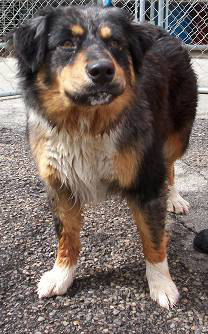

In [23]:
#You can verify the column ordering by viewing some images
from PIL import Image
Image.open(test_path + filenames[2])

In [24]:
#Save our test results arrays so we can use them again later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

## 5. Validate Predictions

Keras' *fit()* function conveniently shows us the value of the loss function, and the accuracy, after every epoch ("*epoch*" refers to one full run through all training examples). The most important metrics for us to look at are for the validation set, since we want to check for over-fitting. 

- **Tip**: with our first model we should try to overfit before we start worrying about how to reduce over-fitting - there's no point even thinking about regularization, data augmentation, etc if you're still under-fitting! (We'll be looking at these techniques shortly).

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

Let's see what we can learn from these examples. (In general, this is a particularly useful technique for debugging problems in the model. However, since this model is so simple, there may not be too much to learn at this stage.)

Calculate predictions on validation set, so we can find correct and incorrect examples:

In [25]:
%cd $results_path
#latest_weights_filename = 'ft2.h5'
#vgg.model.load_weights(results_path+latest_weights_filename)
vgg.model.load_weights(latest_weights_filename)

/home/ubuntu/courses/deeplearning1/data/redux/sample/results


In [26]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 50 images belonging to 2 classes.


In [27]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
# np.round(1-our_predictions) to turn the probability of being cats into isDog labels 
our_labels = np.round(1-our_predictions)

In [29]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

Found 46 correct labels


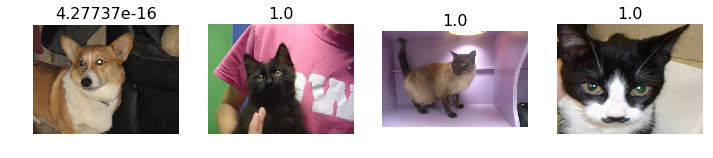

In [30]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print("Found %d correct labels" % len(correct))
idx = permutation(correct)[:n_view]
if len(correct):
    plots_idx(idx, our_predictions[idx])

Found 4 incorrect labels


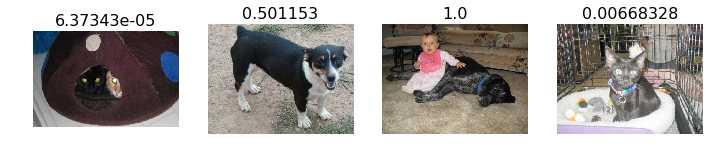

In [31]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print("Found %d incorrect labels" % len(incorrect))
idx = permutation(incorrect)[:n_view]
if len(incorrect):
    plots_idx(idx, our_predictions[idx])

Found 23 confident correct cats labels


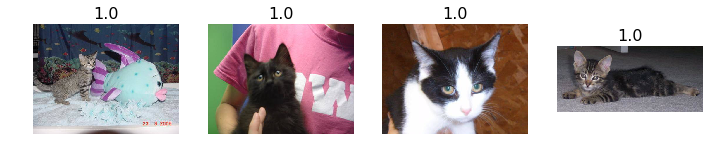

In [32]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print("Found %d confident correct cats labels" % len(correct_cats))
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
if len(most_correct_cats):
    plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

Found 23 confident correct dogs labels


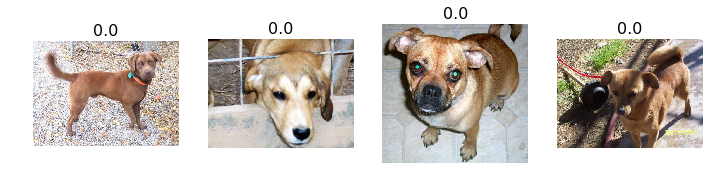

In [33]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print("Found %d confident correct dogs labels" % len(correct_dogs))
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
if len(most_correct_dogs):
    plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

Found 2 incorrect cats


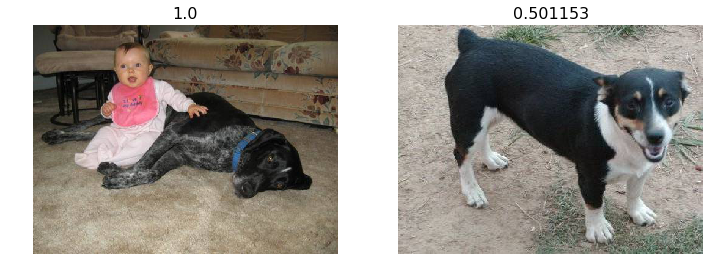

In [34]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print("Found %d incorrect cats" % len(incorrect_cats))
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

Found 2 incorrect dogs


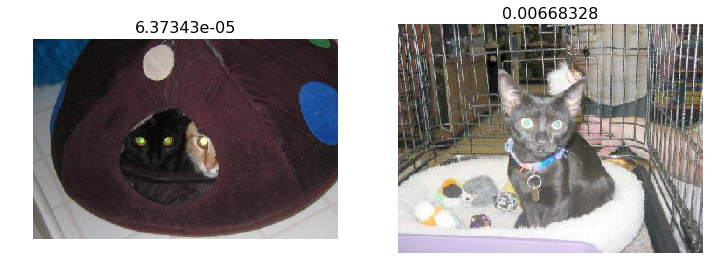

In [35]:
#4b. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print("Found %d incorrect dogs" % len(incorrect_dogs))
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_predictions[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs])

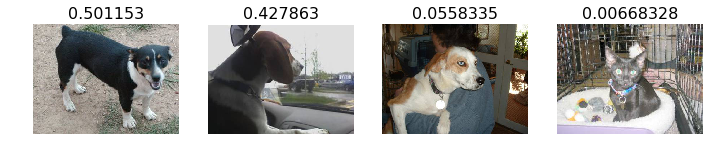

In [36]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
if len(most_uncertain):
    plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

Perhaps the most common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[23  2]
 [ 2 23]]


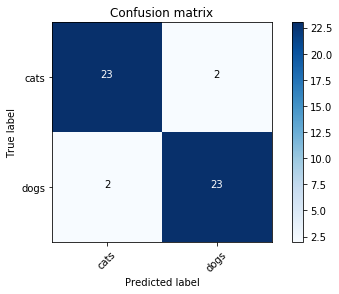

In [39]:
plot_confusion_matrix(cm, val_batches.class_indices)